In [2]:
#Install required libraries
!pip install -q opendatasets

In [3]:
#Importing necessary libraries
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [14]:
#Download dataset from Kaggle (requires authentication)
#Replace <your_kaggle_username> and make sure Kaggle API key is set up in Colab

# od.download("https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python")



In [5]:
#Load the dataset
df = pd.read_csv("/content/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#Basic Exploration
df.info()
df.describe()
df.isnull().sum()


# Rename columns for clarity
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#Encode categorical data
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [8]:
#Select features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]

In [9]:
#Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

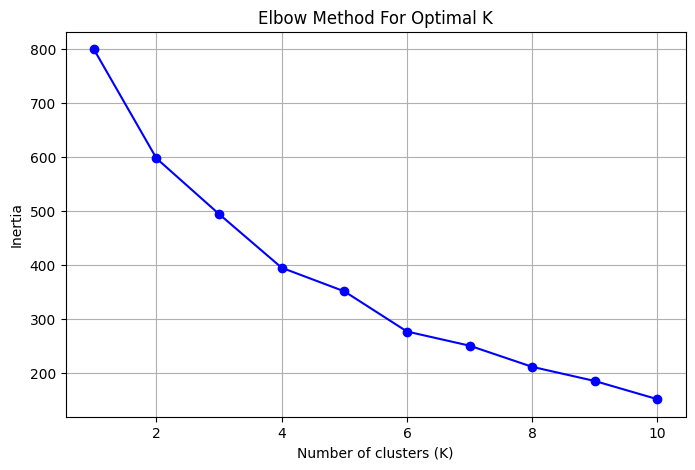

In [10]:
#Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

In [11]:
#Final KMeans with optimal K (choose based on Elbow, e.g., 5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

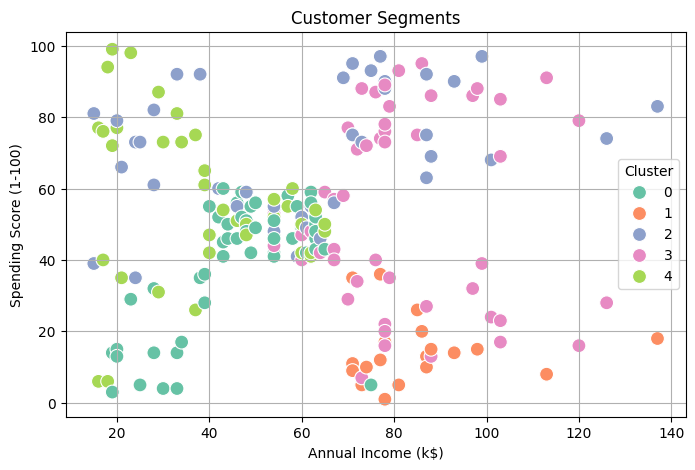

In [12]:
#Visualize clusters using two main features
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='Set2', data=df, s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

In [13]:
#Save clustered data
df.to_csv("segmented_customers.csv", index=False)